In [1]:
import librosa
import librosa.display
import os
import pandas as pd
import numpy as np
from time import time 
import random as rd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import threading
from sklearn.metrics import confusion_matrix,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

path_to_db_voice = "C:\\Users\\antoi\Desktop\\Airbus\\projet_AIRBUS\\db\\voice\\"
path_to_db_plane = "C:\\Users\\antoi\Desktop\\Airbus\\projet_AIRBUS\\db\\plane\\"
path_to_db_both = "C:\\Users\\antoi\Desktop\\Airbus\\projet_AIRBUS\\db\\both\\"

l_voice_records = os.listdir(path_to_db_voice)
l_airplane_records = os.listdir(path_to_db_plane)
l_both_records = os.listdir(path_to_db_both)

In [2]:
def separe_train_test(db_folder_path,n_records,test_size):
    l_records = os.listdir(db_folder_path)
    sub_l_records = rd.sample(l_records,n_records)
    size = len(sub_l_records)
    sep = round(test_size*size)
    sample = rd.sample(sub_l_records,size)
    test = sample[:sep]
    train = sample[sep:]
    return train,test

In [3]:
def gen_X_train_test(db_folder_path,n_records,test_size):
    sp_rec_train = []
    sp_rec_test = []
    hops_train = []
    hops_test = []
    records_train,records_test = separe_train_test(db_folder_path,n_records,test_size)
    i = 0
    for record in records_train:
        print('Building train {}/{}'.format(i,len(records_train)),end='\r')
        signal,sample_rate = librosa.load(db_folder_path + record)
        spectrum = librosa.stft(y=signal,center=False) 
        spectrum = spectrum.astype(float)
        sp_rec_train.append(np.abs(np.transpose(spectrum)))
        hops_train.append(len(signal)//len(spectrum))
        i+=1

        # plt.hist(np.unique(spectrum),bins=200)
        # plt.yscale('log')
        # fig = librosa.display.specshow(spectrum, sr=sample_rate, x_axis='time', y_axis='log')
        # plt.colorbar(format='%+2.0f dB')
        # plt.title('Spectrogram')
        # plt.plot()
        # plt.show()
    i=0
    for record in records_test: 
        print('Building  test {}/{}'.format(i,len(records_test)),end='\r')
        signal,sample_rate = librosa.load(db_folder_path + record)
        spectrum = librosa.stft(y=signal,center=False) 
        spectrum = spectrum.astype(float)
        sp_rec_test.append(np.abs(np.transpose(spectrum)))
        hops_test.append(len(signal)//len(spectrum))
        i+=1

    X_train = np.concatenate(sp_rec_train)
    X_test = np.concatenate(sp_rec_test)

    return X_train,X_test,hops_train,hops_test

In [4]:



n_records = 178

X_voice_train,X_voice_test,hops_voice_train,hops_voice_test= gen_X_train_test(path_to_db_voice,n_records,0.3)
print('Voice done',end='\r')
X_plane_train,X_plane_test,hops_plane_train,hops_plane_test = gen_X_train_test(path_to_db_plane,n_records,0.3)
print('Plane done',end='\r')
X_both_train,X_both_test,hops_both_train,hops_both_test = gen_X_train_test(path_to_db_both,n_records,0.3)
print('Both done',end='\r')

In [5]:
hops_voice_train

[282,
 258,
 276,
 277,
 218,
 316,
 330,
 336,
 316,
 325,
 97,
 306,
 324,
 316,
 305,
 302,
 92,
 324,
 313,
 292,
 270,
 336,
 328,
 312,
 339,
 346,
 278,
 123,
 306,
 299,
 122,
 321,
 315,
 194,
 319,
 331,
 157,
 129,
 143,
 150,
 251,
 62,
 284,
 85,
 292,
 314,
 232,
 317,
 327,
 282,
 273,
 212,
 334,
 217,
 344,
 320,
 134,
 321,
 262,
 334,
 297,
 195,
 189,
 321,
 247,
 59,
 299,
 148,
 222,
 313,
 275,
 342,
 263,
 340,
 313,
 323,
 338,
 262,
 309,
 331,
 341,
 326,
 326,
 305,
 256,
 92,
 216,
 297,
 333,
 286,
 223,
 201,
 276,
 297,
 280,
 329,
 260,
 260,
 113,
 303,
 267,
 142,
 60,
 303,
 281,
 340,
 335,
 297,
 279,
 338,
 162,
 339,
 324,
 325,
 317,
 312,
 304,
 267,
 136,
 96,
 292,
 170,
 330,
 245,
 297]

In [6]:
print(len(X_voice_train) + len(X_plane_train) + len(X_both_train))
print(len(X_plane_train[0]))

198067
1025


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

threshold = 10


import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

y_voice_train = ['Voice' for elt in X_voice_train]
y_plane_train = ['Plane' for elt in X_plane_train]
y_both_train = ['Voice' for elt in X_both_train]

y_voice_test = ['Voice' for elt in X_voice_test]
y_plane_test = ['Plane' for elt in X_plane_test]
y_both_test = ['Voice' for elt in X_both_test]


Y = y_voice_train + y_plane_train + y_both_train + y_plane_test + y_both_test
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train = np.concatenate([X_voice_train,X_plane_train,X_both_train])
X_test = np.concatenate([X_plane_test,X_both_test])

y_train = dummy_y[:len(y_voice_train) + len(y_plane_train) + len(y_both_train)]
y_test = dummy_y[len(y_voice_train) + len(y_plane_train) + len(y_both_train)::]




y_train[0].shape



(2,)

In [21]:
print(y_test)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [66]:
len(y_test)

56221

In [51]:
for k in y_train:
    if k.shape != (2,):
        print(k)


In [61]:
def model():
    model = Sequential()
    model.add(Dense(8, input_dim=1025, activation='relu'))
    model.add(Dense(8, input_dim=512, activation = 'relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [62]:
model = model()
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
3095/3095 [==============================] - 3s 938us/step - loss: 0.3684 - accuracy: 0.8242
Epoch 2/50
3095/3095 [==============================] - 3s 967us/step - loss: 0.3185 - accuracy: 0.8489
Epoch 3/50
3095/3095 [==============================] - 3s 923us/step - loss: 0.3066 - accuracy: 0.8546
Epoch 4/50
3095/3095 [==============================] - 3s 933us/step - loss: 0.3000 - accuracy: 0.8577
Epoch 5/50
3095/3095 [==============================] - 3s 928us/step - loss: 0.2961 - accuracy: 0.8598
Epoch 6/50
3095/3095 [==============================] - 3s 931us/step - loss: 0.2931 - accuracy: 0.8609
Epoch 7/50
3095/3095 [==============================] - 3s 936us/step - loss: 0.2917 - accuracy: 0.8613
Epoch 8/50
3095/3095 [==============================] - 3s 1ms/step - loss: 0.2898 - accuracy: 0.8627
Epoch 9/50
3095/3095 [==============================] - 3s 975us/step - loss: 0.2880 - accuracy: 0.8633
Epoch 10/50
3095/3095 [==============================] - 3s 981us/

In [63]:
y_pred = model.predict(X_test)
y_pred_aux = []
for k in y_pred:
    if k[0]>k[1]:
        y_pred_aux.append([1,0])
    else:
        y_pred_aux.append([0,1])

1832/1832 [==============================] - 1s 547us/step


In [67]:
y_pred[0],y_test[0]

(array([0.782716  , 0.21728405], dtype=float32),
 array([1., 0.], dtype=float32))

In [68]:
bonnePredV = [] #liste des proba prédites pour la voix quand le modèle à raison
bonnePredP = []
mauvaisePredV = [] #liste des proba prédites pour la voix quand le modèle à tord
mauvaisePredP = []


for i in range(len(y_pred)):
    probav,probap = y_pred[i][0],y_pred[i][1]
    if y_test[i][0]==1:
        if probav>probap:
            bonnePredV.append(probav)
        else:
            mauvaisePredV.append(probav)
    else:
        if probap>probav:
            bonnePredP.append(probap)
        else:
            mauvaisePredP.append(probap)


In [69]:
import math as m
import matplotlib.pyplot as plt

def printCar(l):
    moyenne = sum(l)/len(l)
    print("Nombre d'éléments : " + str(len(l)))
    print("Moyenne des probas : " + str(moyenne))
    print("Max : " + str(max(l)) + ", Min : " + str(min(l)))
    ecart_type = m.sqrt(sum((k-moyenne)**2 for k in l) / len(l))
    print("Ecart type : " + str(ecart_type))
    plt.hist(l)

Nombre d'éléments : 24474
Moyenne des probas : 0.766005800797521
Max : 0.98827374, Min : 0.5000005
Ecart type : 0.10762457010312203


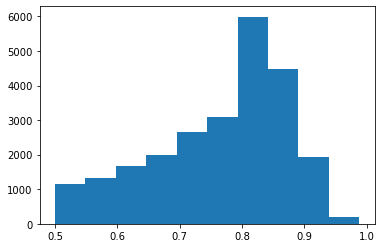

In [70]:
printCar(bonnePredV)

Nombre d'éléments : 19933
Moyenne des probas : 0.9109836737306886
Max : 1.0, Min : 0.5000033
Ecart type : 0.13962549794558723


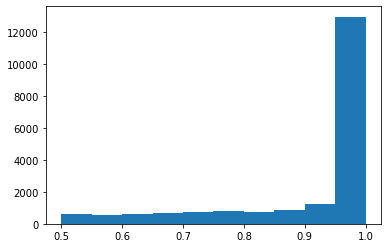

In [71]:
printCar(bonnePredP)

Nombre d'éléments : 4982
Moyenne des probas : 0.3062931287780989
Max : 0.49996963, Min : 0.0
Ecart type : 0.14607805991056907


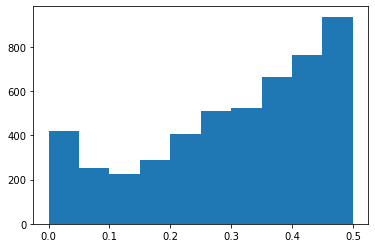

In [72]:
printCar(mauvaisePredV) #on prédit avion alors que c'est voix : histo des proba prédite pour voix par le modèle

Nombre d'éléments : 9211
Moyenne des probas : 0.26227218091560606
Max : 0.4999188, Min : 0.00046599598
Ecart type : 0.11853131921030059


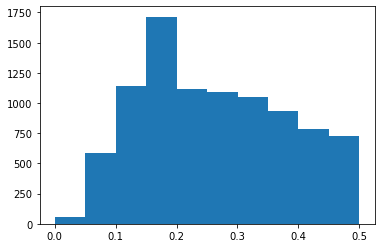

In [73]:
printCar(mauvaisePredP) #on prédit voix alors que c'est avion : histo des proba prédite pour avion par le modèle

(array([420., 250., 224., 289., 405., 508., 524., 665., 761., 936.]),
 array([0.        , 0.04999696, 0.09999393, 0.14999089, 0.19998786,
        0.24998482, 0.29998177, 0.34997874, 0.39997572, 0.44997266,
        0.49996963], dtype=float32),
 <BarContainer object of 10 artists>)

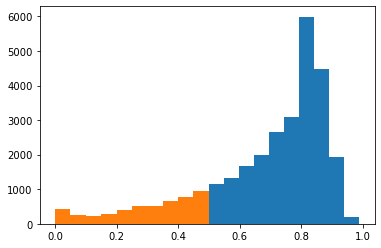

In [74]:
#Histogramme des probabilités prédites pour la voix 

plt.hist(bonnePredV)
plt.hist(mauvaisePredV)

(array([  56.,  589., 1145., 1715., 1114., 1094., 1053.,  936.,  783.,
         726.]),
 array([4.6599598e-04, 5.0411277e-02, 1.0035656e-01, 1.5030183e-01,
        2.0024711e-01, 2.5019240e-01, 3.0013767e-01, 3.5008296e-01,
        4.0002823e-01, 4.4997352e-01, 4.9991879e-01], dtype=float32),
 <BarContainer object of 10 artists>)

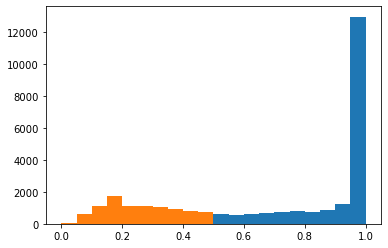

In [75]:
#Histogramme des probabilités prédites pour avion

plt.hist(bonnePredP)
plt.hist(mauvaisePredP)

In [66]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_pred_aux,y_test)
print('Accuracy is:', a*100)

Accuracy is: 75.77986348122867


In [65]:
def has_voice2(x,hop,duration_sec_threshold,error_threshold):
    ratio = np.count_nonzero(x=='Voice')/len(x)
    duration_discrete_threshold = round(duration_sec_threshold * 22050 / hop)
    binary_pred = [0 if elt=='Plane' else 1 for elt in x]
    df_x = pd.DataFrame(binary_pred)
    df_sum = df_x.rolling(duration_discrete_threshold).mean()
    x_plot = [elt*hop/22050 for elt in range(len(x))] #x en seconds
    # plt.plot(x_plot,df_sum[0])
    # plt.show()
    return len(df_sum[df_sum[0]>error_threshold])>0

In [72]:
def has_voice_vote(y,hop,duration_sec_threshold):
    duration_discrete_threshold = round(duration_sec_threshold * 22050 / hop)
    votes = []
    for i in range(len(y)-duration_discrete_threshold):
        #window = y[i:i+duration_discrete_threshold]
        vote_window = 0
        for k in range(i,i+duration_discrete_threshold):
            confiance = y[i][0]-y[i][1]
            vote_window += confiance
        votes.append(vote_window/duration_discrete_threshold)
    return votes
    
                

PARTIE MODELE

In [39]:
# pca = PCA(0.99).fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [40]:
from sklearn.metrics import accuracy_score

pred = rf.predict(X_test)
accuracy_score(pred,y_test)

0.4558223833257816

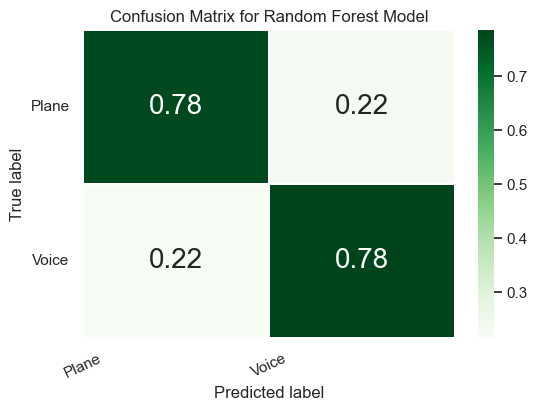

In [145]:


pred = rf.predict(X_test)
matrix = confusion_matrix(pred,y_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(6,4))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Plane','Voice']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

TEST DE LA RF SAUVEGARDEE

In [71]:
import joblib 

rf = joblib.load("random_forest.joblib")
# joblib.dump(rf, "random_forest.joblib")


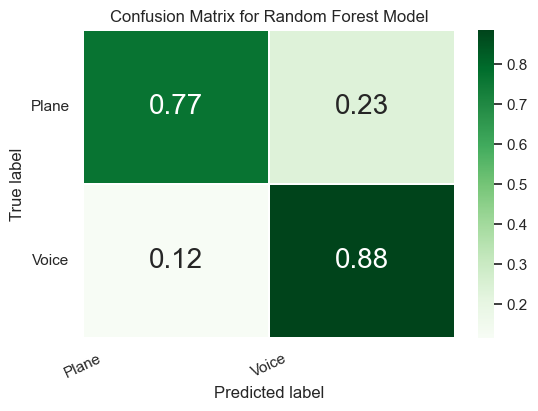

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


pred = rf.predict(X_test)
matrix = confusion_matrix(pred,y_test)
# pred = rf.predict(X_test)
# matrix = confusion_matrix(pred,y_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(6,4))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = rf.classes_
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [179]:
def has_voice(x,hop,duration_sec_threshold,error_threshold):
    ratio = np.count_nonzero(x=='Voice')/len(x)
    duration_discrete_threshold = duration_sec_threshold * 22050 / hop
    if len(x) >duration_discrete_threshold and ratio > error_threshold:
        print('Durée de la voix: ',len(x)*hop/22050,'seconds')
        return True
    elif len(x)<duration_discrete_threshold:
        return False
    else:
        half = len(x)//2
        return has_voice(x[:half],hop,duration_sec_threshold,error_threshold) or has_voice(x[half:],hop,duration_sec_threshold,error_threshold)

def has_voice2(x,hop,duration_sec_threshold,error_threshold):
    ratio = np.count_nonzero(x=='Voice')/len(x)
    duration_discrete_threshold = round(duration_sec_threshold * 22050 / hop)
    binary_pred = [0 if elt=='Plane' else 1 for elt in x]
    df_x = pd.DataFrame(binary_pred)
    df_sum = df_x.rolling(duration_discrete_threshold).mean()
    x_plot = [elt*hop/22050 for elt in range(len(x))] #x en seconds
    # plt.plot(x_plot,df_sum[0])
    # plt.show()
    return len(df_sum[df_sum[0]>error_threshold])>0

def gen_valid_test(db_folder_path,n_records):

    l_records = os.listdir(db_folder_path)
    sub_l_records = rd.sample(l_records,n_records)
    sample = rd.sample(sub_l_records,n_records)
    sp_valid = []
    hops_valid = []
    for i in range(n_records):
        print('Building validation set {}/{}'.format(i,n_records),end='\r')
        signal,sample_rate = librosa.load(db_folder_path + sample[i])
        spectrum = librosa.stft(y=signal,center=False) 
        spectrum = spectrum.astype(float)
        # fig = librosa.display.specshow(spectrum, sr=sample_rate, x_axis='time', y_axis='log')
        # plt.colorbar(format='%+2.0f dB')
        # plt.title('Spectrogram')
        # plt.plot()
        # plt.show()
        good_shape_spectrum = np.abs(np.transpose(spectrum))
        sp_valid.append(good_shape_spectrum)
        hops_valid.append(len(signal)//len(good_shape_spectrum))

    return sp_valid,hops_valid

def valid_model(model,duration_threshold,error_threshold,n_records):
    plane_valid,hops_plane = gen_valid_test(path_to_db_plane,n_records)
    both_valid,hops_both = gen_valid_test(path_to_db_both,n_records)

    target_plane = [False for elt in plane_valid]
    target_both = [True for elt in both_valid]
    
    records_valid = plane_valid + both_valid
    target_valid =  target_plane + target_both
    hops_valid = hops_plane + hops_both

    # records_valid = both_valid
    # target_valid =  target_both
    # hops_valid = hops_both

    # records_valid = plane_valid
    # target_valid =  target_plane
    # hops_valid = hops_plane

    # print(hops_valid)

    prediction_for_records = []
    for i  in range(len(records_valid)):
        pred = model.predict(records_valid[i])
        prediction_for_records.append(has_voice2(pred,hops_valid[i],duration_threshold,error_threshold))

    return accuracy_score(target_valid,prediction_for_records)

In [ ]:
valid_model(rf,2,0.63,4)

In [185]:
def hyper_tune_valid(model,n_records,n_iter):
    
    dur_range = np.linspace(1,5,6)
    thresh_range = np.linspace(0.5,1,20)

    best_dur,best_thresh,best_valid = 0,0,0

    for i in range(n_iter):
        
        if best_valid ==1:
            return best_dur,best_thresh,best_valid

        dur = rd.choice(dur_range)
        thresh = rd.choice(thresh_range)
        val = valid_model(model,dur,thresh,n_records)

        if val > best_valid:
            best_valid = val
            best_dur = dur
            best_thresh = thresh

    return best_dur,best_thresh,best_valid



In [186]:
hyper_tune_valid(rf,10,70)

(1.8, 0.7894736842105263, 0.95)